In [1]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('solarizedl')

### IMPORTING LIBRARIES AND READING SAMPLE DATAFILE

In [2]:
import pandas as pnd
import numpy as npy
import matplotlib.pyplot as plt  
%matplotlib inline
sample = pnd.read_csv("http://bit.ly/w-data")v
sample.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### DATA EXPLORATION

In [3]:
sample.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
sample.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
sample.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


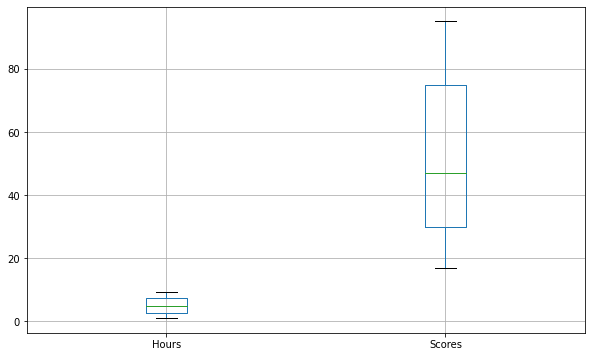

In [6]:
sample.boxplot(figsize=(10, 6))
plt.show()

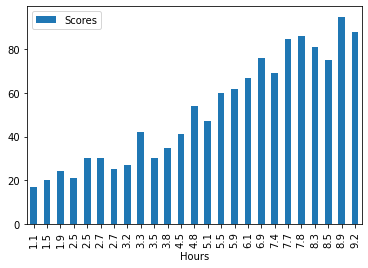

In [7]:
sample.sort_values('Hours').plot(x="Hours", y="Scores", kind="bar")
plt.show()

Text(0.5, 1.0, 'Hours vs Score')

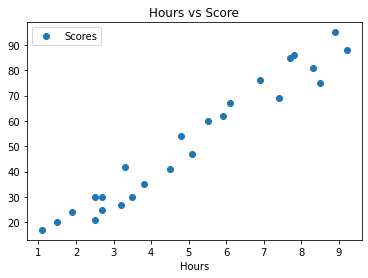

In [8]:
sample.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')   

### BUILDING MODEL

In [9]:
from sklearn.model_selection import train_test_split as slt 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
X = sample.iloc[:, :-1].values  
Y = sample.iloc[:, 1].values 

In [11]:
X_train, X_test, Y_train, Y_test = slt(X, Y, 
                            test_size=0.25, random_state=0) 

In [12]:
lr.fit(X_train, Y_train) 
Y_pred = lr.predict(X_test)

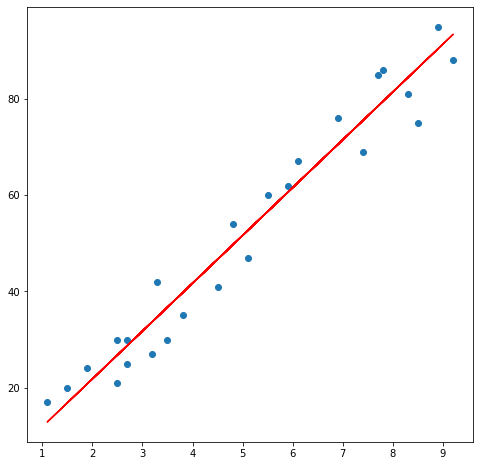

In [13]:
plt.figure(figsize=(8,8))  
plt.scatter(X, Y)
plt.plot(X,lr.predict(X)  , color='red')
plt.show()

In [14]:
hours = [[9.25]]
pred_of_input =lr.predict(hours)
print("Hours =  ",hours[0][0])
print("Predicted Score =  ",pred_of_input[0])

Hours =   9.25
Predicted Score =   93.89272889341652


### EVALUATION

#### Root Mean Square Error

In [15]:
from sklearn.metrics import mean_squared_error
import math
print('Root Mean Square Error:',math.sqrt(mean_squared_error(Y_test, Y_pred)))

Root Mean Square Error: 4.509204328368805


#### Mean Absolute Error

In [16]:
from sklearn.metrics import mean_absolute_error as mae
print('Mean Absolute Error:', mae(Y_test, Y_pred))

Mean Absolute Error: 4.130879918502482


#### R Square and Adjusted R Square

In [17]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
result=sm.OLS(Y_train,X_train).fit()
print('R Square Value:',result.rsquared)
print('Adjusted R Square Value:', result.rsquared_adj)

R Square Value: 0.9913671067726945
Adjusted R Square Value: 0.9908592895240295
